In [1]:
import pandas as pd

# Load the dataset to examine its structure
data_path = 'boardex_sample_1000.csv'
boardex_data = pd.read_csv(data_path)

# Display the first few rows of the dataframe and its column information
boardex_data.head(), boardex_data.columns

(  Associationtype                               Boardname  \
 0           Other  1 800 CONTACTS INC (De-listed 09/2007)   
 1    Unlisted Org  1 800 CONTACTS INC (De-listed 09/2007)   
 2    Unlisted Org  1 800 CONTACTS INC (De-listed 09/2007)   
 3      Listed Org  1 800 CONTACTS INC (De-listed 09/2007)   
 4    Unlisted Org  1 800 CONTACTS INC (De-listed 09/2007)   
 
                             Companyname Directorname  Overlapyearstart  \
 0  Rhode Island School of Design (RISD)    Steve Key              2006   
 1                    Key Consulting LLC    Steve Key              2005   
 2            JD Watkins Enterprises Inc    Steve Key              2006   
 3        SITEL CORP (De-listed 01/2007)    Steve Key              2006   
 4            JD Watkins Enterprises Inc    Steve Key              2005   
 
   Overlapyearend                             Role  \
 0           2007  Independent Director (Brd) (SD)   
 1           2007  Independent Director (Brd) (SD)   
 2          

/tmp/ipykernel_82976/120398155.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph_data.drop_duplicates(inplace=True)
/tmp/ipykernel_82976/120398155.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph_data['Overlapyearend'] = pd.to_numeric(graph_data['Overlapyearend'], errors='coerce')


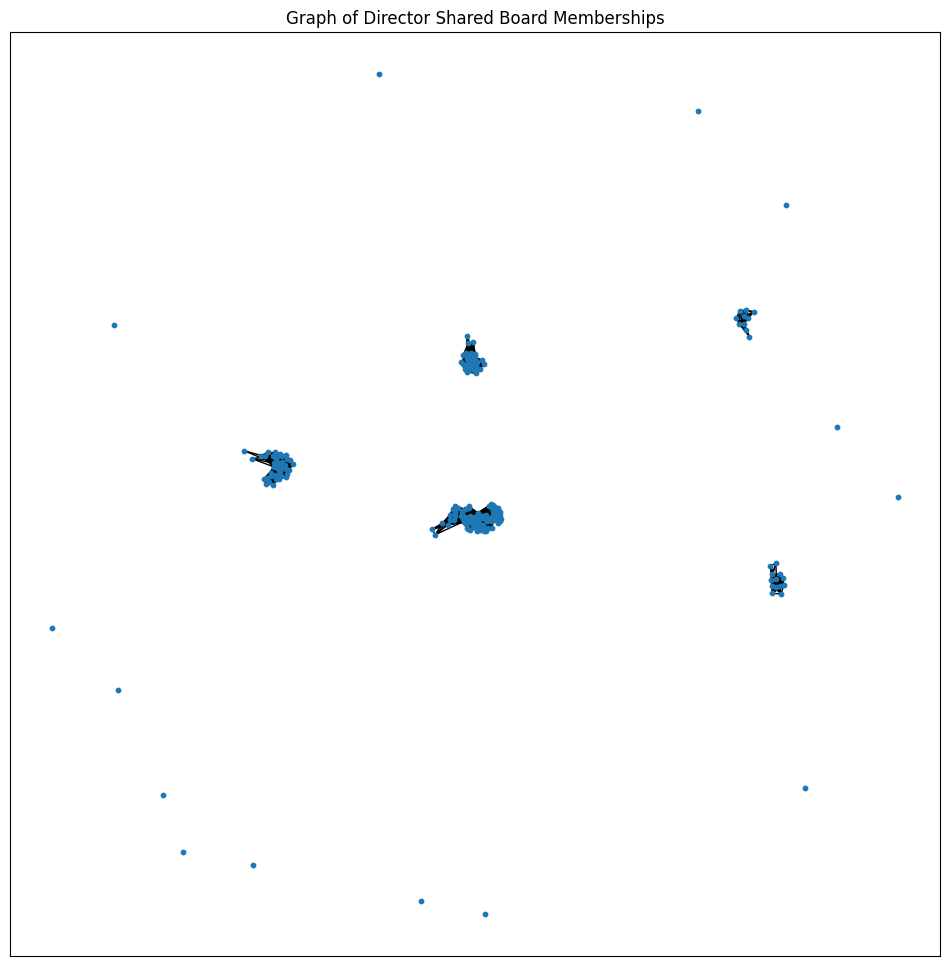

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

# Filter necessary columns and drop duplicates
graph_data = boardex_data[['Directorname', 'Boardid', 'Overlapyearstart', 'Overlapyearend']]
graph_data.drop_duplicates(inplace=True)



graph_data['Overlapyearend'].replace("Curr", 2024)
graph_data['Overlapyearend'] = pd.to_numeric(graph_data['Overlapyearend'], errors='coerce')

# Create a graph
G = nx.Graph()

# Add nodes and edges based on board membership
for _, row in graph_data.iterrows():
    # Add node for each director if not already present
    G.add_node(row['Directorname'], type='director')
    
    # Find all directors that are on the same board during overlapping years
    same_board_directors = graph_data[(graph_data['Boardid'] == row['Boardid']) &
                                      (graph_data['Overlapyearstart'] <= row['Overlapyearend']) &
                                      (graph_data['Overlapyearend'] >= row['Overlapyearstart'])]
    
    # Create edges between directors
    for _, other_row in same_board_directors.iterrows():
        if row['Directorname'] != other_row['Directorname']:
            G.add_edge(row['Directorname'], other_row['Directorname'], board=row['Boardid'])

# Draw the graph
plt.figure(figsize=(12, 12))
nx.draw_networkx(G, with_labels=False, node_size=10, font_size=8)
plt.title("Graph of Director Shared Board Memberships")
plt.show()


Show the euro details

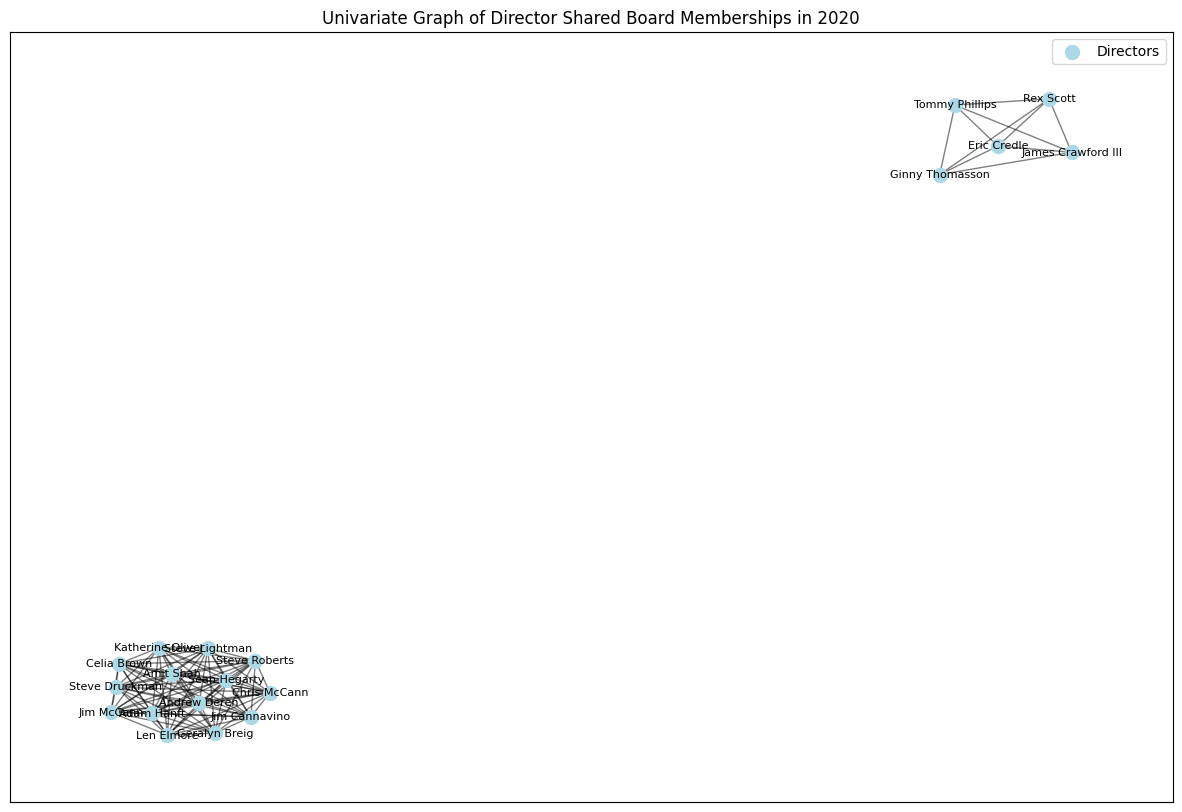

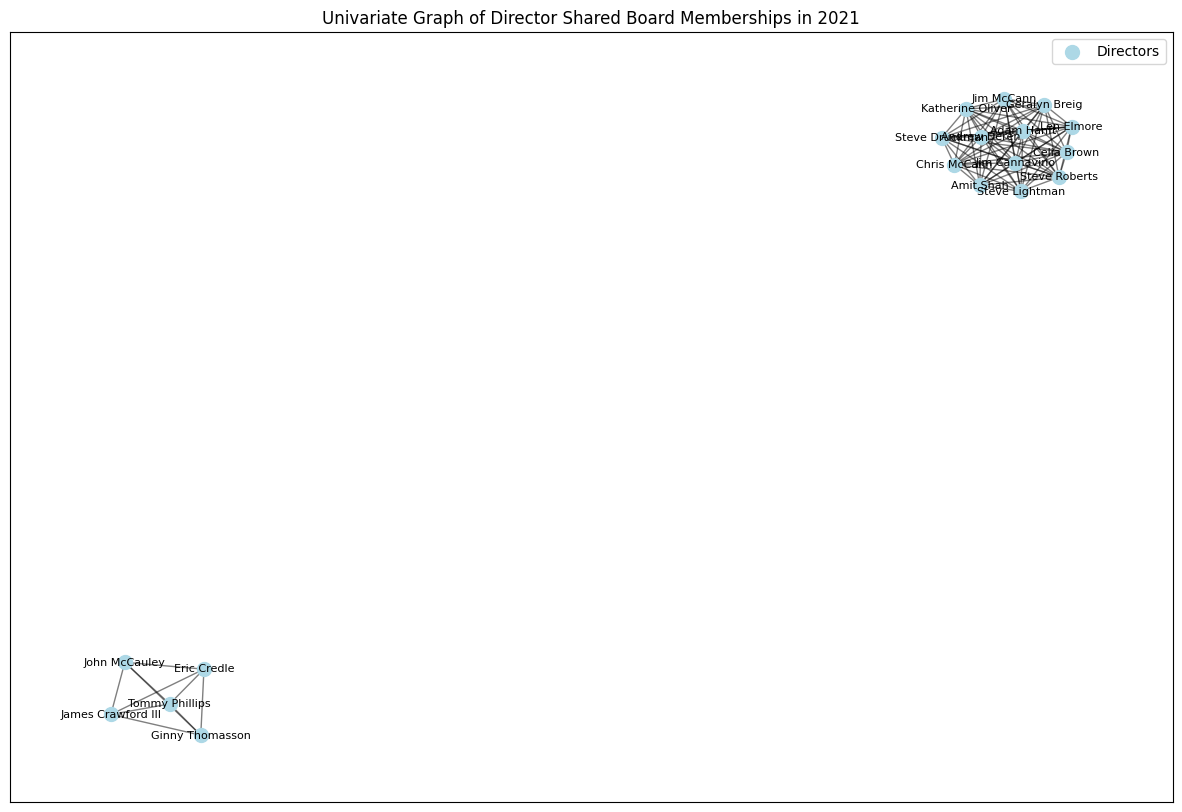

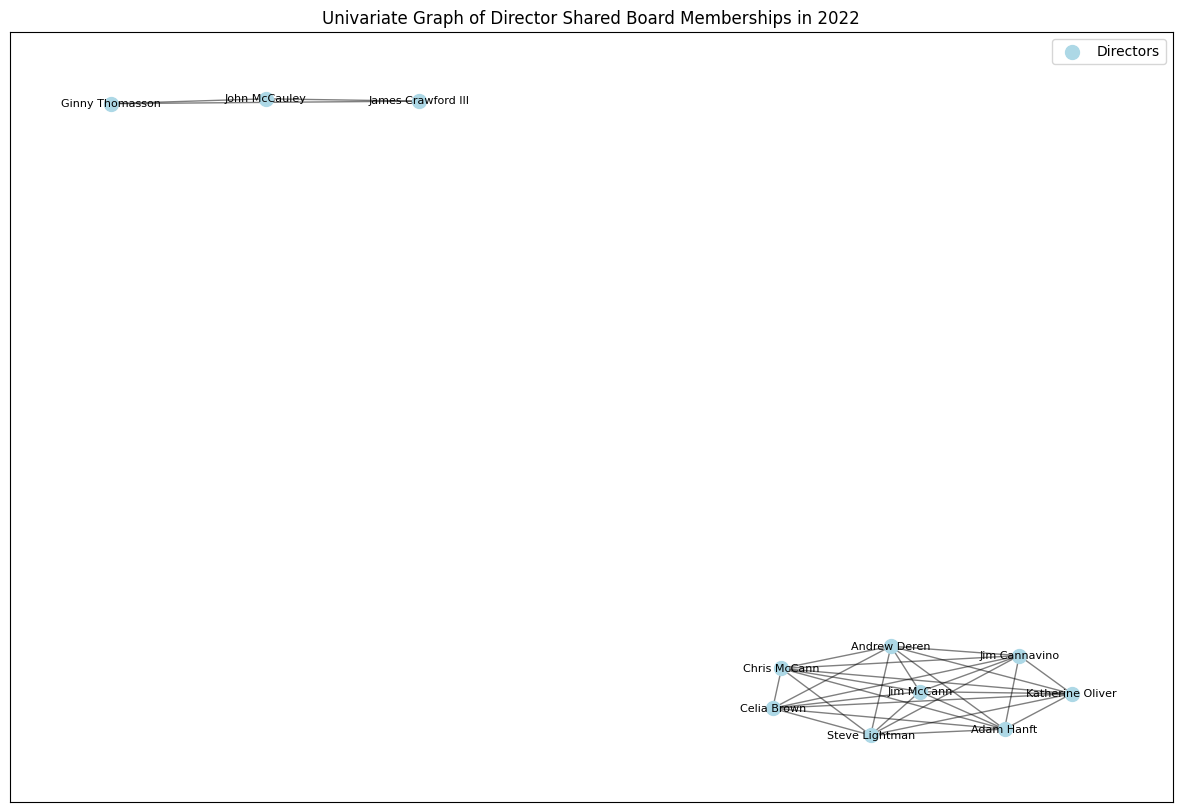

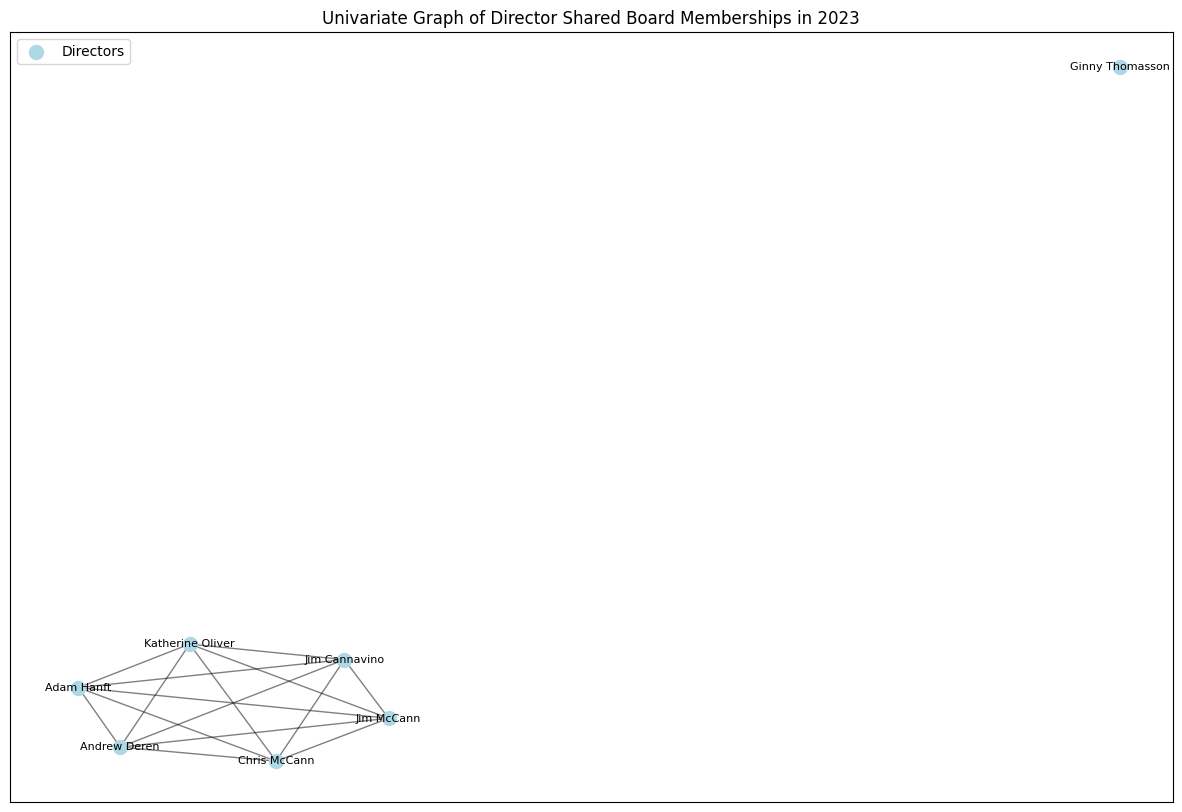

In [8]:
# Filter the necessary columns again
filtered_data = boardex_data[['Directorname', 'Boardid', 'Overlapyearstart', 'Overlapyearend']].drop_duplicates()

# filter the above like the graph data above

filtered_data['Overlapyearend'].replace("Curr", 2024)
filtered_data['Overlapyearend'] = pd.to_numeric(filtered_data['Overlapyearend'], errors='coerce')

# Define years range for visualizations
years = range(int(filtered_data['Overlapyearstart'].min()), int(filtered_data['Overlapyearend'].max()) + 1)

# Create the univariate graph for the last two years in the dataset
for year in years[-5:]:
    U = nx.Graph()

    # Add nodes and edges with appropriate attributes
    for index, row in filtered_data.iterrows():
        if year >= row['Overlapyearstart'] and year <= row['Overlapyearend']:
            director_name = row['Directorname']
            U.add_node(director_name, type='director')  # Add director node
            
            # Find all directors that are on the same board during this specific year
            same_board_directors = filtered_data[(filtered_data['Boardid'] == row['Boardid']) &
                                                 (filtered_data['Overlapyearstart'] <= year) &
                                                 (filtered_data['Overlapyearend'] >= year)]
            
            # Create edges between directors
            for _, other_row in same_board_directors.iterrows():
                if director_name != other_row['Directorname']:
                    U.add_edge(director_name, other_row['Directorname'], board=row['Boardid'])
    
    # Only draw the graph if it has edges
    if U.edges:
        plt.figure(figsize=(15, 10))
        pos = nx.spring_layout(U)  # Positions for all nodes
        
        # Draw nodes and edges
        nx.draw_networkx_nodes(U, pos, node_color='lightblue', node_size=100, label='Directors')
        nx.draw_networkx_edges(U, pos, alpha=0.5)
        nx.draw_networkx_labels(U, pos, font_size=8, font_color='black')
        
        plt.title(f'Univariate Graph of Director Shared Board Memberships in {year}')
        plt.legend()
        plt.show()


In [9]:
# Prepare a dictionary to store adjacency matrices and node lists for each year
adjacency_matrices = {}
node_lists = {}

for year in years[-2:]:
    U = nx.Graph()

    # Add nodes and edges with appropriate attributes
    for index, row in filtered_data.iterrows():
        if year >= row['Overlapyearstart'] and year <= row['Overlapyearend']:
            director_name = row['Directorname']
            U.add_node(director_name, type='director')  # Add director node
            
            # Find all directors that are on the same board during this specific year
            same_board_directors = filtered_data[(filtered_data['Boardid'] == row['Boardid']) &
                                                 (filtered_data['Overlapyearstart'] <= year) &
                                                 (filtered_data['Overlapyearend'] >= year)]
            
            # Create edges between directors
            for _, other_row in same_board_directors.iterrows():
                if director_name != other_row['Directorname']:
                    U.add_edge(director_name, other_row['Directorname'], board=row['Boardid'])

    # Store the adjacency matrix and node list if the graph has edges
    if U.edges:
        adjacency_matrices[year] = nx.adjacency_matrix(U).todense()
        node_lists[year] = list(U.nodes())

# Output the node lists and shapes of the adjacency matrices for verification
node_lists, {year: mat.shape for year, mat in adjacency_matrices.items()}

({2023: ['Andrew Deren',
   'Jim McCann',
   'Katherine Oliver',
   'Adam Hanft',
   'Chris McCann',
   'Jim Cannavino',
   'Ginny Thomasson']},
 {2023: (7, 7)})

In [10]:
adjacency_matrices

{2023: array([[0, 1, 1, 1, 1, 1, 0],
        [1, 0, 1, 1, 1, 1, 0],
        [1, 1, 0, 1, 1, 1, 0],
        [1, 1, 1, 0, 1, 1, 0],
        [1, 1, 1, 1, 0, 1, 0],
        [1, 1, 1, 1, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0]])}

In [11]:
node_lists

{2023: ['Andrew Deren',
  'Jim McCann',
  'Katherine Oliver',
  'Adam Hanft',
  'Chris McCann',
  'Jim Cannavino',
  'Ginny Thomasson']}

In [13]:
len(node_lists[2023])

# get the graph details for this - with the different graphs

# problem is that you need the same matrix here.

7

Get same standardised directors

This is needed to keep track of things, so maybe sparse matrices here

Ask about this!!

In [16]:
# same standardised directors.

# Collect all unique directors to standardize node list across all years
all_directors = set(filtered_data['Directorname'])

# Prepare a dictionary to store standardized adjacency matrices for each year
standardized_adj_matrices = {}
standardized_node_lists = list(all_directors)  # Fixed list of all directors

for year in years[-4:]:
    U = nx.Graph()
    
    # Add all directors as nodes, even if they don't form any connections this year
    for director in all_directors:
        U.add_node(director, type='director')
    
    # Add edges with appropriate attributes for the current year
    for index, row in filtered_data.iterrows():
        if year >= row['Overlapyearstart'] and year <= row['Overlapyearend']:
            director_name = row['Directorname']
            
            # Find all directors that are on the same board during this specific year
            same_board_directors = filtered_data[(filtered_data['Boardid'] == row['Boardid']) &
                                                 (filtered_data['Overlapyearstart'] <= year) &
                                                 (filtered_data['Overlapyearend'] >= year)]
            
            # Create edges between directors
            for _, other_row in same_board_directors.iterrows():
                if director_name != other_row['Directorname']:
                    U.add_edge(director_name, other_row['Directorname'], board=row['Boardid'])
    
    # Store the standardized adjacency matrix
    standardized_adj_matrices[year] = nx.adjacency_matrix(U, nodelist=standardized_node_lists).todense()

# Output shapes of the standardized adjacency matrices for verification
{year: mat.shape for year, mat in standardized_adj_matrices.items()}


{2021: (211, 211), 2022: (211, 211), 2023: (211, 211), 2024: (211, 211)}

In [17]:
standardized_adj_matrices

{2021: array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 2022: array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 2023: array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 2024: array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])}

## Conclusion

based on the same directors and sparse matrices here.

get a lot of sparse matrices for these to apply application - need a lot more data to facilitate this!!

Hence more years the more memory there will be.



### Next steps

Find a particular industry to work on, get the graph and text together, and actually start telling a meaningful story!!